# **Agriculture Health (Tomato Leaf Health Disease)**
The dataset used in this project was collected from Kaggle. It contains tomato leaf images categorized into 8 different classes, includes:

*   Tomato healthy
*   Tomato bacterial spot
*   Tomato early Blight
*   Tomato late Blight
*   Tomato seporia leaf spot
*   Tomato target spot
*   Tomato yellow Leaf curl virus
*   Tomato leaf Mold

The dataset was organized in separate folders for each class to support image classification tasks.

Group Members:
1. NUR ADLINA SOFEA BINTI MAHDZIR (52213124699)
2. NOR NAJLAH HANINI BINTI HAIRUL NIZAM (52213124652)
3. MUHAMMAD IZZAT A'KIF BIN MOHD SANUSI (52215124688)

# **Data Preparation**

In [ ]:
# mount gdrive
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/

Mounted at /content/drive/
/content/drive/My Drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
import time

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

**Resnet50**

In [ ]:
train_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
assert train_batches_resnet50.n == 9774
assert valid_batches_resnet50.n == 2095
assert test_batches_resnet50.n == 2093
assert train_batches_resnet50.num_classes == valid_batches_resnet50.num_classes == test_batches_resnet50.num_classes == 8

In [ ]:
imgs , labels = next(train_batches_resnet50)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

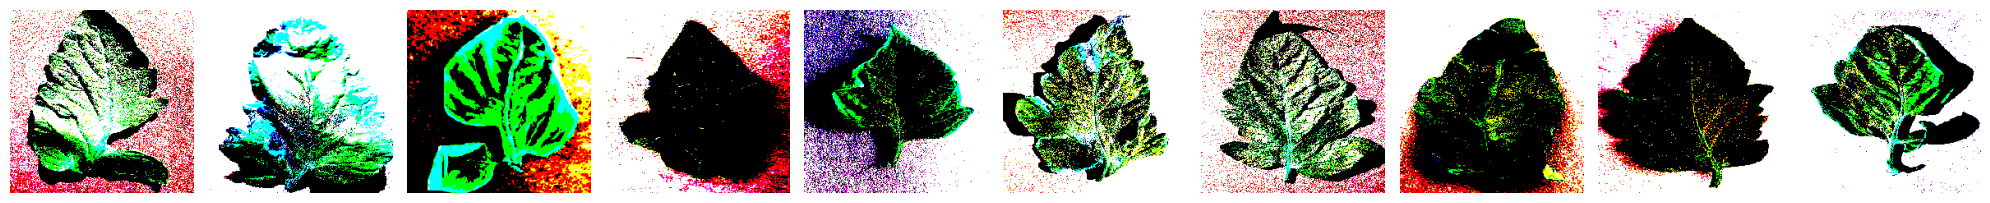

[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

**DenseNet121**

In [ ]:
train_batches_denseNet121 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_denseNet121 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_denseNet121 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
assert train_batches_denseNet121.n == 9774
assert valid_batches_denseNet121.n == 2095
assert test_batches_denseNet121.n == 2093
assert train_batches_denseNet121.num_classes == valid_batches_denseNet121.num_classes == test_batches_denseNet121.num_classes == 8

In [ ]:
imgs , labels = next(train_batches_denseNet121)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

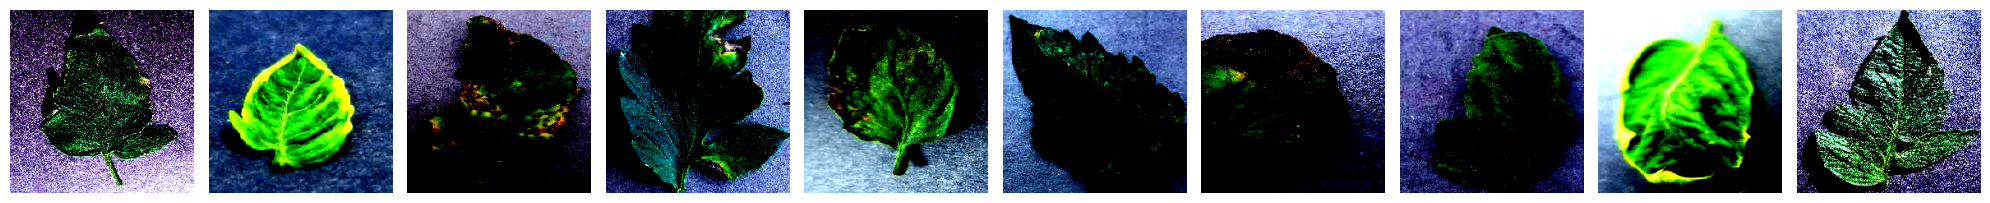

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

**MobileNetv3**

In [ ]:
train_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
assert train_batches_mobileNetv3.n == 9774
assert valid_batches_mobileNetv3.n == 2095
assert test_batches_mobileNetv3.n == 2093
assert train_batches_mobileNetv3.num_classes == valid_batches_mobileNetv3.num_classes == test_batches_mobileNetv3.num_classes == 8

In [ ]:
imgs , labels = next(train_batches_mobileNetv3)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

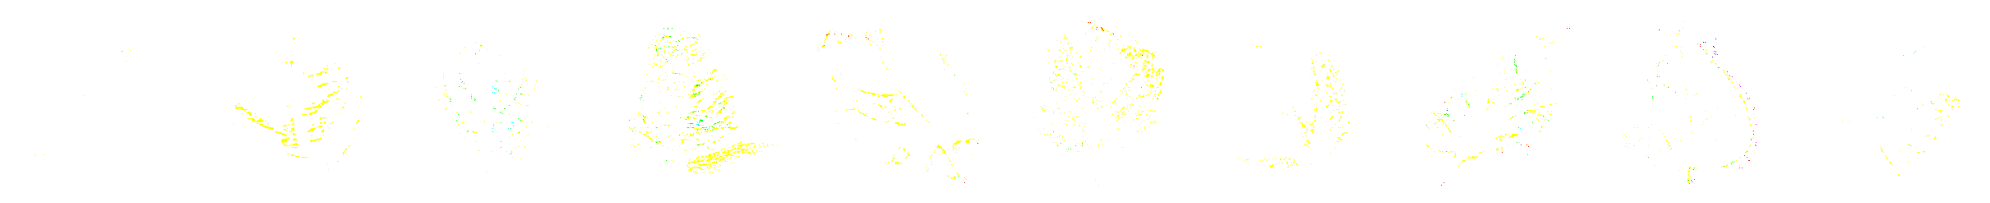

[[0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

**Data Modelling**

*   Neural Network
*   Train the model
*   Hyperparameter tuning





# **ResNet50 Model**

In [ ]:
train_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_resnet50 = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D

base_model_resnet50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model_resnet50.trainable = False
model_resnet50 = Sequential([
    base_model_resnet50,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='softmax')
])

model_resnet50.summary()



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,312 (91.99 MB)

 Trainable params: 526,600 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

#Start time
start_time = time.time()

# Compile model
model_resnet50.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit model
history_resnet50 = model_resnet50.fit(
    x=train_batches_resnet50,
    steps_per_epoch=len(train_batches_resnet50),
    validation_data=valid_batches_resnet50,
    validation_steps=len(valid_batches_resnet50),
    epochs=50,
    verbose=2,
    callbacks=[early_stop]
)

# End timer
end_time = time.time()

# Calculate total training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
306/306 - 2623s - 9s/step - accuracy: 0.7631 - loss: 0.7333 - val_accuracy: 0.9069 - val_loss: 0.3313
Epoch 2/50
306/306 - 40s - 130ms/step - accuracy: 0.9141 - loss: 0.2904 - val_accuracy: 0.9379 - val_loss: 0.2120
Epoch 3/50
306/306 - 40s - 131ms/step - accuracy: 0.9393 - loss: 0.2061 - val_accuracy: 0.9504 - val_loss: 0.1683
Epoch 4/50
306/306 - 39s - 128ms/step - accuracy: 0.9547 - loss: 0.1547 - val_accuracy: 0.9652 - val_loss: 0.1333
Epoch 5/50
306/306 - 40s - 131ms/step - accuracy: 0.9663 - loss: 0.1249 - val_accuracy: 0.9671 - val_loss: 0.1196
Epoch 6/50
306/306 - 39s - 128ms/step - accuracy: 0.9684 - loss: 0.1083 - val_accuracy: 0.9647 - val_loss: 0.1141
Epoch 7/50
306/306 - 40s - 130ms/step - accuracy: 0.9770 - loss: 0.0865 - val_accuracy: 0.9704 - val_loss: 0.0996
Epoch 8/50
306/306 - 40s - 129ms/step - accuracy: 0.9782 - loss: 0.0753 - val_accuracy: 0.9733 - val_loss: 0.0968
Epoch 9/50
306/306 - 40s - 130ms/step - accuracy: 0.9818 - loss: 0.0655 - val_accuracy: 0

# **DenseNet121 Model**

In [ ]:
train_batches_denseNet121 = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_denseNet121  = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_denseNet121  = ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D

base_model_densenet121 = DenseNet121(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model_densenet121.trainable = False  # Freeze DenseNet121 layers

# Build the full model
model_denseNet121 = Sequential([
    base_model_densenet121,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(8, activation='softmax')
])

model_denseNet121.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,301,960 (27.85 MB)

 Trainable params: 264,456 (1.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
#Start time
start_time = time.time()

# Compile model
model_denseNet121.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit model
history_denseNet121 = model_denseNet121.fit(
    x=train_batches_denseNet121,
    steps_per_epoch=len(train_batches_denseNet121),
    validation_data=valid_batches_denseNet121,
    validation_steps=len(valid_batches_denseNet121),
    epochs=50,
    verbose=2,
    callbacks=[early_stop]
)

# End timer
end_time = time.time()

# Calculate total training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/50
306/306 - 103s - 336ms/step - accuracy: 0.5744 - loss: 1.2682 - val_accuracy: 0.8248 - val_loss: 0.6597
Epoch 2/50
306/306 - 38s - 124ms/step - accuracy: 0.8152 - loss: 0.6000 - val_accuracy: 0.8816 - val_loss: 0.4273
Epoch 3/50
306/306 - 39s - 128ms/step - accuracy: 0.8662 - loss: 0.4347 - val_accuracy: 0.8993 - val_loss: 0.3412
Epoch 4/50
306/306 - 39s - 128ms/step - accuracy: 0.8888 - loss: 0.3553 - val_accuracy: 0.9212 - val_loss: 0.2851
Epoch 5/50
306/306 - 40s - 129ms/step - accuracy: 0.9071 - loss: 0.3071 - val_accuracy: 0.9236 - val_loss: 0.2540
Epoch 6/50
306/306 - 39s - 127ms/step - accuracy: 0.9199 - loss: 0.2619 - val_accuracy: 0.9375 - val_loss: 0.2278
Epoch 7/50
306/306 - 38s - 125ms/step - accuracy: 0.9295 - loss: 0.2344 - val_accuracy: 0.9317 - val_loss: 0.2194
Epoch 8/50
306/306 - 39s - 128ms/step - accuracy: 0.9350 - loss: 0.2126 - val_accuracy: 0.9470 - val_loss: 0.1917
Epoch 9/50
306/306 - 40s - 130ms/step - accuracy: 0.9407 - loss: 0.1933 - val_accuracy:

# **MobileNetv3 Model**

In [ ]:
train_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/train', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
valid_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/valid', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32)
test_batches_mobileNetv3 = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input)\
                .flow_from_directory(directory='/content/drive/MyDrive/Ai Project/dataset/test', target_size=(224,224), classes=['tomato_yellow_leaf_curly_virus', 'tomato_target_spot','tomato_septoria_leaf_spot','tomato_leaf_mold','tomato_late_blight','tomato_healthy','tomato_early_blight','tomato_bacterial_spot'], batch_size = 32, shuffle=False)

Found 9774 images belonging to 8 classes.
Found 2095 images belonging to 8 classes.
Found 2093 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.applications import mobilenet_v3
from tensorflow.keras.applications import MobileNetV3Small


base_model_mobilenetv3 = MobileNetV3Small(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model_mobilenetv3.trainable = False  # Freezing the base model

# Build the final model
model_mobilenetV3 = Sequential([
    base_model_mobilenetv3,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),  # Helps prevent overfitting
    Dense(8, activation='softmax')  # Output layer for 8-class classification
])

model_mobilenetV3.summary()


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,088,888 (4.15 MB)

 Trainable params: 149,768 (585.03 KB)

 Non-trainable params: 939,120 (3.58 MB)

In [ ]:
#Start time
start_time = time.time()

# Compile model
model_mobilenetV3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Fit model
history_mobileNetv3 = model_mobilenetV3.fit(
    x=train_batches_mobileNetv3,
    steps_per_epoch=len(train_batches_mobileNetv3),
    validation_data=valid_batches_mobileNetv3,
    validation_steps=len(valid_batches_mobileNetv3),
    epochs=50,
    verbose=2,
    callbacks=[early_stop]
)

# End timer
end_time = time.time()

# Calculate total training time
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Epoch 1/50
306/306 - 65s - 213ms/step - accuracy: 0.6250 - loss: 1.1250 - val_accuracy: 0.8215 - val_loss: 0.6233
Epoch 2/50
306/306 - 34s - 110ms/step - accuracy: 0.8169 - loss: 0.5849 - val_accuracy: 0.8931 - val_loss: 0.4198
Epoch 3/50
306/306 - 32s - 106ms/step - accuracy: 0.8676 - loss: 0.4303 - val_accuracy: 0.8998 - val_loss: 0.3477
Epoch 4/50
306/306 - 34s - 113ms/step - accuracy: 0.8919 - loss: 0.3571 - val_accuracy: 0.9246 - val_loss: 0.2901
Epoch 5/50
306/306 - 32s - 106ms/step - accuracy: 0.9127 - loss: 0.3003 - val_accuracy: 0.9337 - val_loss: 0.2596
Epoch 6/50
306/306 - 32s - 105ms/step - accuracy: 0.9211 - loss: 0.2628 - val_accuracy: 0.9360 - val_loss: 0.2311
Epoch 7/50
306/306 - 33s - 109ms/step - accuracy: 0.9239 - loss: 0.2402 - val_accuracy: 0.9356 - val_loss: 0.2183
Epoch 8/50
306/306 - 34s - 110ms/step - accuracy: 0.9372 - loss: 0.2165 - val_accuracy: 0.9422 - val_loss: 0.2045
Epoch 9/50
306/306 - 33s - 108ms/step - accuracy: 0.9437 - loss: 0.1946 - val_accuracy: 

**Data Visualization**
*   Loss and Accuracy
*   Confussion Matrix



# **ResNet50 Visualization**


*   **Loss and Accuracy**


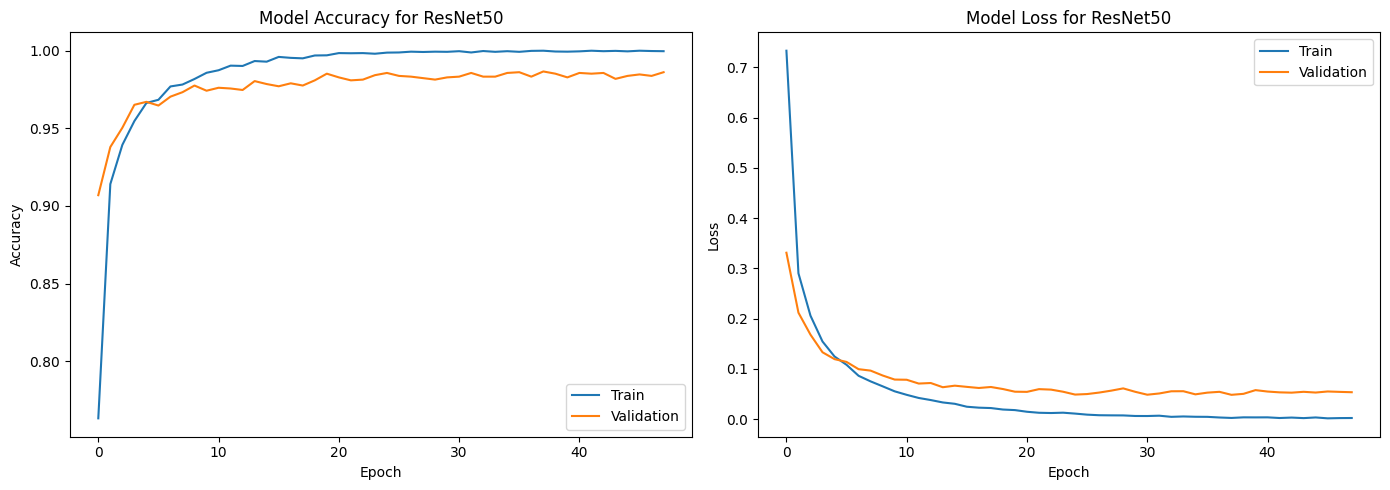

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy plot (Left)
plt.subplot(1, 2, 1)
plt.plot(history_resnet50.history['accuracy'])
plt.plot(history_resnet50.history['val_accuracy'])
plt.title('Model Accuracy for ResNet50')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss plot (Right)
plt.subplot(1, 2, 2)
plt.plot(history_resnet50.history['loss'])
plt.plot(history_resnet50.history['val_loss'])
plt.title('Model Loss for ResNet50')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# **DenseNet121 Visualization**

*   **Loss and Accuracy**


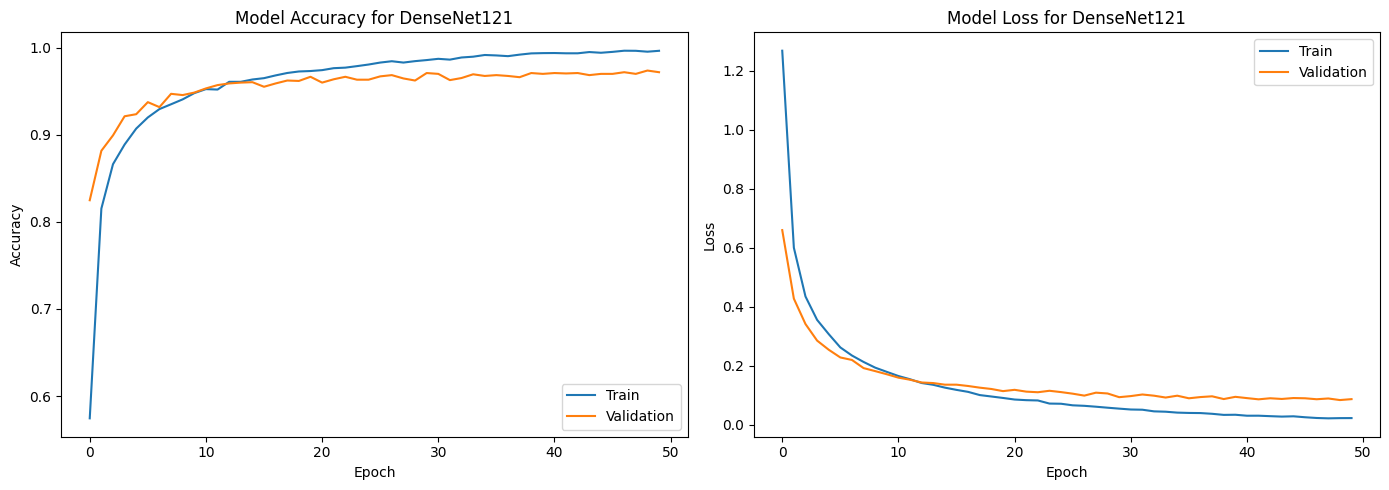

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy plot (Left)
plt.subplot(1, 2, 1)
plt.plot(history_denseNet121.history['accuracy'])
plt.plot(history_denseNet121.history['val_accuracy'])
plt.title('Model Accuracy for DenseNet121')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss plot (Right)
plt.subplot(1, 2, 2)
plt.plot(history_denseNet121.history['loss'])
plt.plot(history_denseNet121.history['val_loss'])
plt.title('Model Loss for DenseNet121')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# **MobileNetv3 Visualization**

*   **Loss and Accuracy**

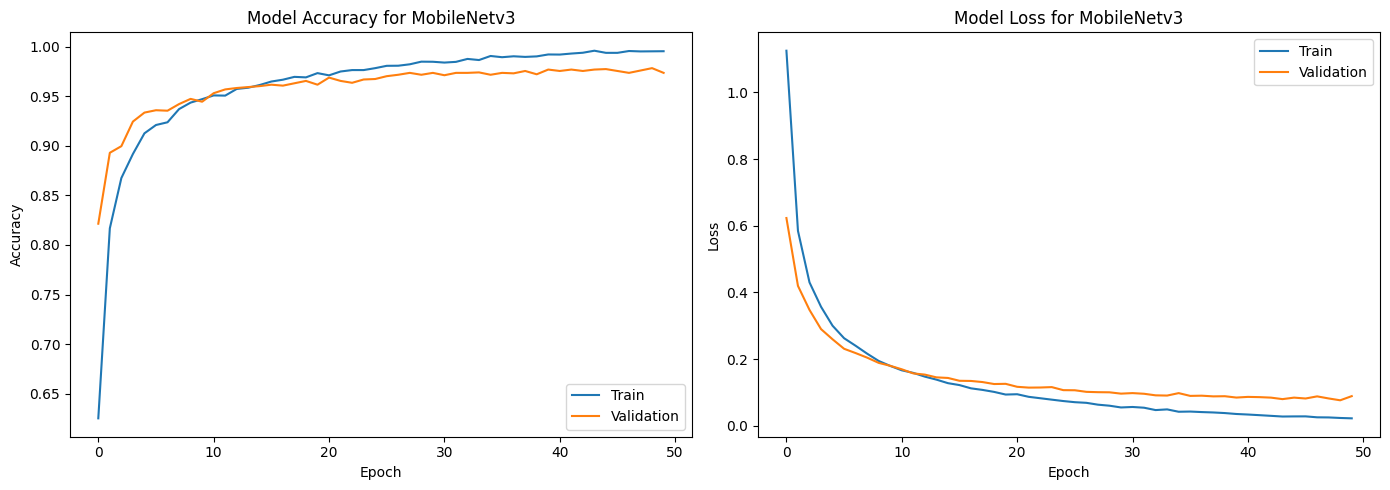

In [ ]:
plt.figure(figsize=(14, 5))

# Accuracy plot (Left)
plt.subplot(1, 2, 1)
plt.plot(history_mobileNetv3.history['accuracy'])
plt.plot(history_mobileNetv3.history['val_accuracy'])
plt.title('Model Accuracy for MobileNetv3')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss plot (Right)
plt.subplot(1, 2, 2)
plt.plot(history_mobileNetv3.history['loss'])
plt.plot(history_mobileNetv3.history['val_loss'])
plt.title('Model Loss for MobileNetv3')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# **Confusion Matrix**

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 8))  # Enlarged figure for clearer labels
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right", fontsize=10)
    plt.yticks(tick_marks, classes, fontsize=10)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        value = f"{cm[i, j]:.2f}" if normalize else f"{cm[i, j]}"
        plt.text(j, i, value,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=10)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)
    plt.show()

**ResNet50 Confusion Matrix**

In [ ]:
# Define class labels
cm_plot_labels = ['tomato_yellow_leaf_curly_virus', 'tomato_target_spot', 'tomato_septoria_leaf_spot',
                  'tomato_leaf_mold', 'tomato_late_blight', 'tomato_healthy', 'tomato_early_blight',
                  'tomato_bacterial_spot']

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 544s 8s/step
Confusion matrix, without normalization
[[479   0   0   0   1   0   0   1]
 [  0 206   0   0   1   0   3   0]
 [  0   0 263   1   0   0   1   0]
 [  0   0   1 141   0   0   1   0]
 [  0   0   0   0 277   0  10   0]
 [  0   0   0   0   0 238   0   0]
 [  1   0   2   0   4   0 142   1]
 [  1   2   0   0   2   0   2 312]]


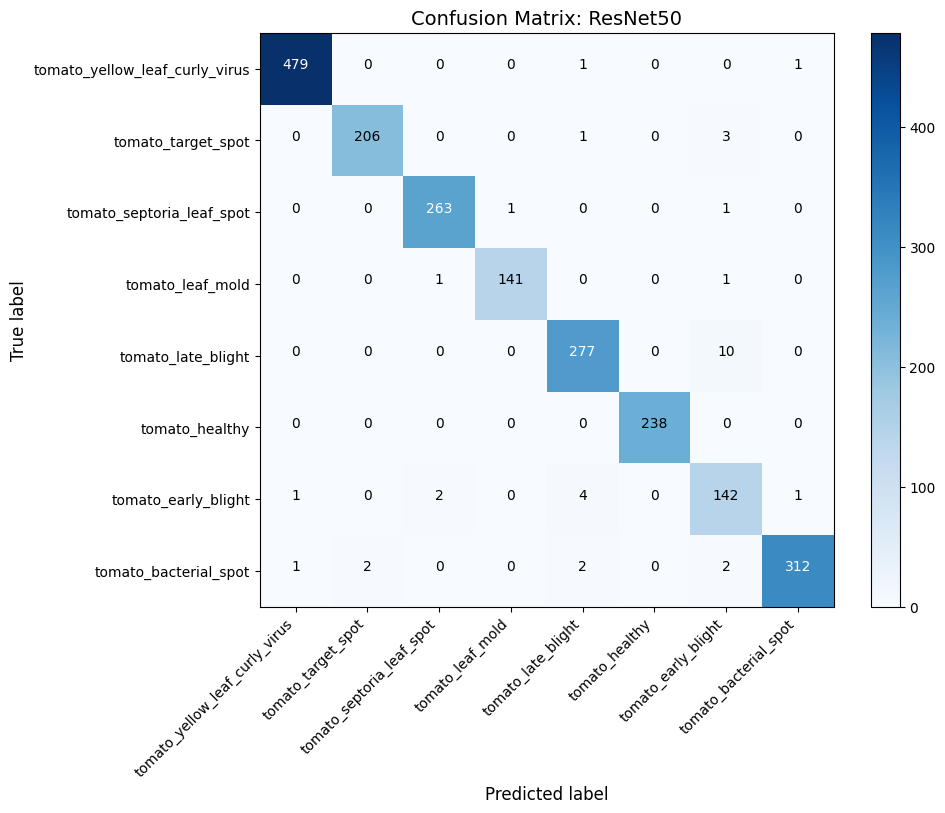

In [ ]:
test_labels = np.array(test_batches_resnet50.classes, dtype=int)

# Make predictions using ResNet50
test_preds_resnet50 = model_resnet50.predict(test_batches_resnet50)
test_preds_labels_resnet50 = np.argmax(test_preds_resnet50, axis=1)

# Compute confusion matrix for ResNet50
cm_resnet50 = confusion_matrix(test_labels, test_preds_labels_resnet50)

# Plot confusion matrix for ResNet50
plot_confusion_matrix(cm_resnet50, cm_plot_labels, title='Confusion Matrix: ResNet50')

**DenseNet121 Confusion Matrix**

In [ ]:
# Ensure test labels are correctly extracted
test_labels = np.array(test_batches_denseNet121.classes, dtype=int)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 314ms/step
Confusion matrix, without normalization
[[479   0   0   0   1   0   0   1]
 [  0 204   5   0   0   0   1   0]
 [  0   5 259   0   0   0   0   1]
 [  0   1   1 139   1   0   1   0]
 [  0   0   0   1 279   0   7   0]
 [  0   4   1   1   1 231   0   0]
 [  0   3   2   0   7   0 137   1]
 [  2   3   1   0   1   0   3 309]]


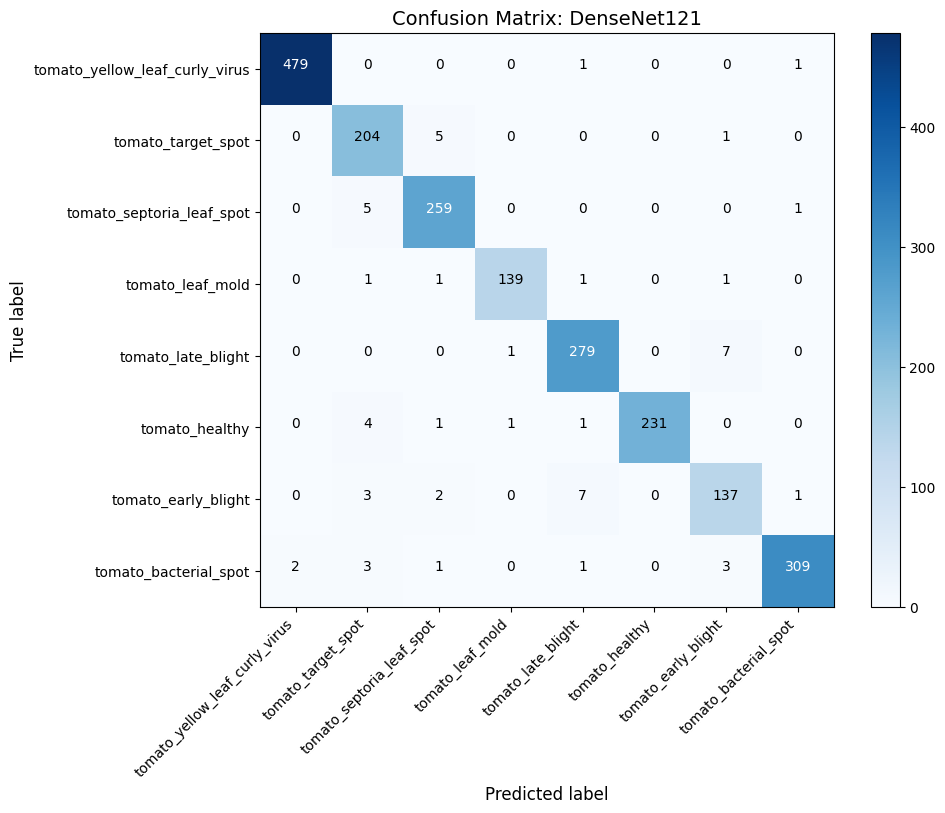

In [ ]:
# Make predictions using DenseNet121
test_preds_densenet = model_denseNet121.predict(test_batches_denseNet121)
test_preds_labels_densenet = np.argmax(test_preds_densenet, axis=1)

# Compute confusion matrix for DenseNet121
cm_densenet121 = confusion_matrix(test_labels, test_preds_labels_densenet)

# Plot confusion matrix for DenseNet121
plot_confusion_matrix(cm_densenet121, cm_plot_labels, title='Confusion Matrix: DenseNet121')

***MobileNetv3 Confusion Matrix ***

In [ ]:
# Ensure test labels are correctly extracted
test_labels = np.array(test_batches_mobileNetv3.classes, dtype=int)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step
Confusion matrix, without normalization
[[477   1   0   0   0   0   1   2]
 [  0 204   2   0   1   0   1   2]
 [  0   0 258   1   1   0   4   1]
 [  0   2   1 139   0   0   0   1]
 [  0   1   0   1 273   0  11   1]
 [  0   1   0   0   0 237   0   0]
 [  0   5   2   2   8   0 132   1]
 [  3   1   3   0   2   0   2 308]]


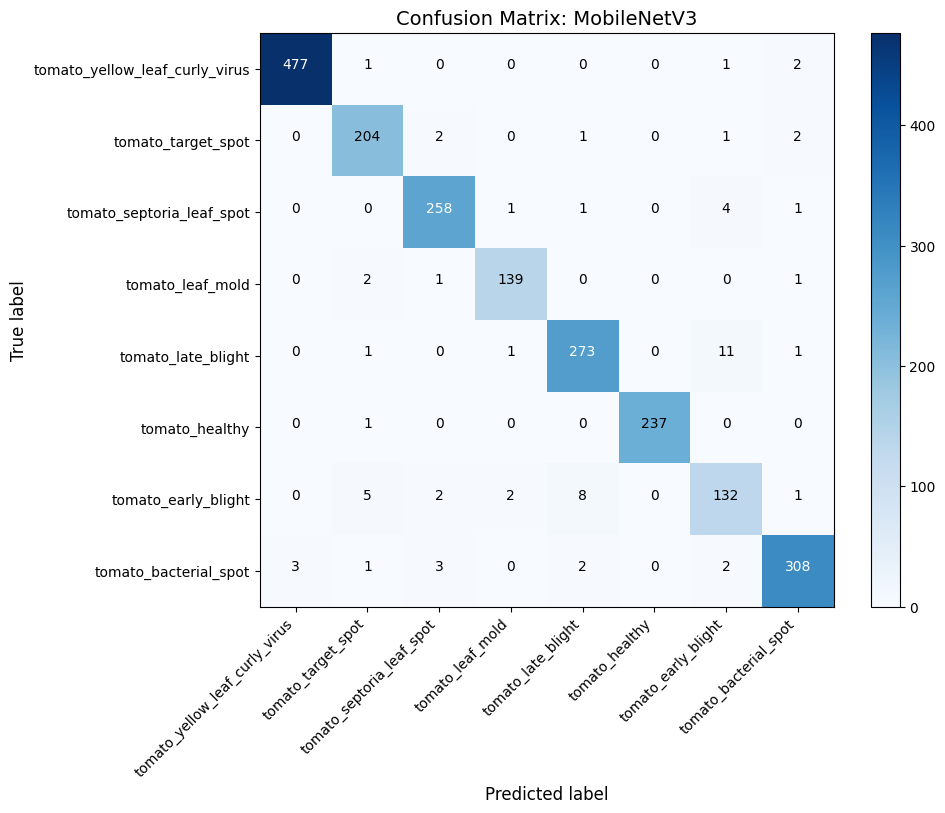

In [ ]:
# Make predictions using MobileNetV3
test_preds_mobilenet = model_mobilenetV3.predict(test_batches_mobileNetv3)
test_preds_labels_mobilenet = np.argmax(test_preds_mobilenet, axis=1)

# Compute confusion matrix for MobileNetV3
cm_mobilenetv3 = confusion_matrix(test_labels, test_preds_labels_mobilenet)

# Plot confusion matrix for MobileNetV3
plot_confusion_matrix(cm_mobilenetv3, cm_plot_labels, title='Confusion Matrix: MobileNetV3')

**Model Evaluation**

In [ ]:
# Evaluate ResNet50
loss_resnet, acc_resnet = model_resnet50.evaluate(test_batches_resnet50, batch_size=32)
print(f"ResNet50 Test Loss: {loss_resnet:.4f}")
print(f"ResNet50 Test Accuracy: {acc_resnet:.4f}")

# Evaluate DenseNet121
loss_densenet, acc_densenet = model_denseNet121.evaluate(test_batches_denseNet121, batch_size=32)
print(f"DenseNet121 Test Loss: {loss_densenet:.4f}")
print(f"DenseNet121 Test Accuracy: {acc_densenet:.4f}")

# Evaluate MobileNetV3
loss_mobilenet, acc_mobilenet = model_mobilenetV3.evaluate(test_batches_mobileNetv3, batch_size=32)
print(f"MobileNetV3 Test Loss: {loss_mobilenet:.4f}")
print(f"MobileNetV3 Test Accuracy: {acc_mobilenet:.4f}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9902 - loss: 0.0321
ResNet50 Test Loss: 0.0539
ResNet50 Test Accuracy: 0.9833
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.9844 - loss: 0.0555
DenseNet121 Test Loss: 0.0809
DenseNet121 Test Accuracy: 0.9732
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9799 - loss: 0.0701
MobileNetV3 Test Loss: 0.0906
MobileNetV3 Test Accuracy: 0.9689


# **mAP (Mean Average Precisions)**

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Define test datasets for each CNN
test_batches_list = [test_batches_resnet50, test_batches_denseNet121, test_batches_mobileNetv3]
model_list = [model_resnet50, model_denseNet121, model_mobilenetV3]
model_names = ["ResNet50", "DenseNet121", "MobileNetV3"]

# Loop through each model to compute mAP
for i in range(3):  # Iterate over the three CNNs
    print(f"\nComputing mAP for {model_names[i]}")

    # Get predictions for the corresponding model
    test_preds = model_list[i].predict(test_batches_list[i])

    # Get true labels
    true_labels = np.array(test_batches_list[i].classes, dtype=int)  # Ensure correct labels

    # Compute AP for each class
    average_precision = []
    for class_idx in range(8):  # Assuming 8 classes
        precision, recall, _ = precision_recall_curve(true_labels == class_idx, test_preds[:, class_idx])
        ap = average_precision_score(true_labels == class_idx, test_preds[:, class_idx])
        average_precision.append(ap)

    # Compute mean Average Precision (mAP)
    mAP_score = np.mean(average_precision)
    print(f"mAP Score for {model_names[i]}: {mAP_score:.4f}")



Computing mAP for ResNet50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step
mAP Score for ResNet50: 0.9960

Computing mAP for DenseNet121
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step
mAP Score for DenseNet121: 0.9944

Computing mAP for MobileNetV3
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step
mAP Score for MobileNetV3: 0.9911


# **Conclusion Analysis of CNN Models**

<h2><b>1. ResNet50</b></h2>

**A. Loss and Accuracy Analysis:**
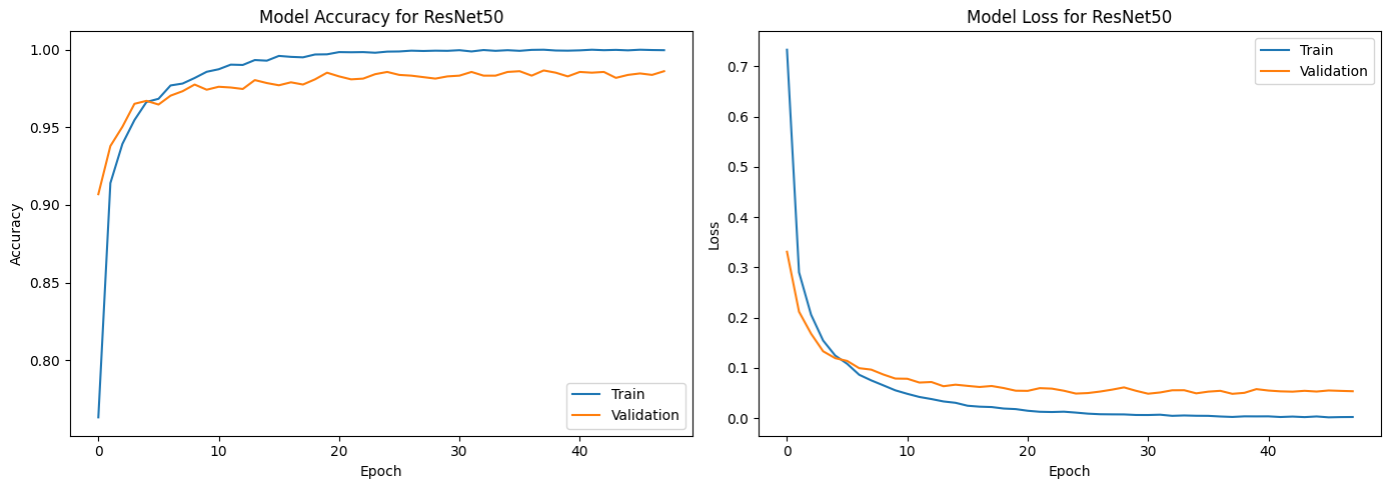
<ul>
    <li><b>Training Accuracy:</b>  
    <p> Starts around 0.75-0.76 and quickly increases, reaching over 0.99 by the end of training (Epoch 45), indicating the model fits the training data very well.</p></li>&nbsp
    <li><b>Validation Accuracy:</b>  
    <p> Starts around 0.90, quickly rises to approximately 0.98, and largely maintains this high level throughout the training, suggesting good generalization to unseen data.</p></li>&nbsp
    <li><b>Training Loss: </b>
    <p> Decreases steadily from around 0.72 and approaches 0 by the end of training, indicating a good fit to the training data.</p>&nbsp
 </li>
    <li><b>Validation Loss: </b>
    <p>Starts around 0.32, decreases initially, and then flattens out and fluctuates around 0.05-0.06, suggesting the model is performing well on the validation set, though with a slight gap from the training loss, hinting at minor overfitting.</p>
</li>
</ul> &nbsp


*  <b>Interpretation:</b>
  <p>The model learns quickly, reaching near-perfect training accuracy and low loss. It also generalizes well, with validation accuracy around 98% and low loss. A slight gap between training and validation suggests minor overfitting, but overall, the model remains strong and reliable.
</p>  &nbsp


**B. Confusion Matrix Analysis:**
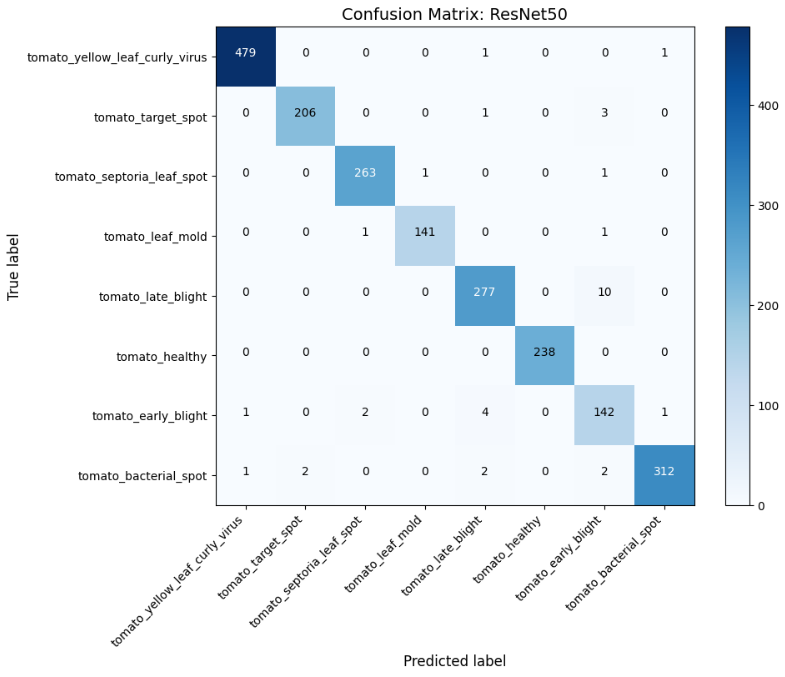


<b> Insights:</b>
<ul>
<li><b>Correct Classifications:</b> &nbsp The model correctly classified a total of 2058 instances across all eight classes. The highest number of correct classifications was for 'tomato_yellow_leaf_curly_virus' (479), followed by 'tomato_bacterial_spot' (312) and 'tomato_late_blight' (277).</li>
&nbsp
<li> <b>Misclassifications:</b> &nbsp A total of 35 instances were misclassified. The most notable misclassification occurs when the model predicts 'tomato_early_blight' (10 instances) when the true label was 'tomato_late_blight'. Other misclassifications are very low, typically 1 to 3 instances per cell.
</li>
</ul> &nbsp

<b>Analysis: </b>
<ul>
<li><b>High Errors:</b> &nbsp The primary area of confusion for the model is between 'tomato_late_blight' and 'tomato_early_blight', where 10 instances of actual 'late blight' were incorrectly identified as 'early blight'. This suggests that these two diseases might have visually similar features that challenge the model.
</li> &nbsp

<li><b>Best Performance:</b> &nbsp The model performed exceptionally well in classifying 'tomato_yellow_leaf_curly_virus' (479 correct, only 2 misclassified) and 'tomato_healthy' (238 correct, 0 misclassified). 'tomato_septoria_leaf_spot' also shows strong performance with 263 correct classifications and only 3 misclassifications. This indicates the model is highly accurate in identifying these specific conditions or the absence of disease.
</li>
</ul> &nbsp


**C. mAP  (Mean Average Precision) :**


*   **mAP Score:** 0.9960

*   **Interpretation:**  A score of 0.9960 (99.6%) indicates the model achieves excellent precision and recall, it's highly accurate in detecting and correctly identifying nearly all tomato plant conditions. This aligns well with the high accuracy, low loss, and minimal misclassifications observed.











<h2><b>2. DenseNet121</b></h2>

**A. Loss and Accuracy Analysis:**
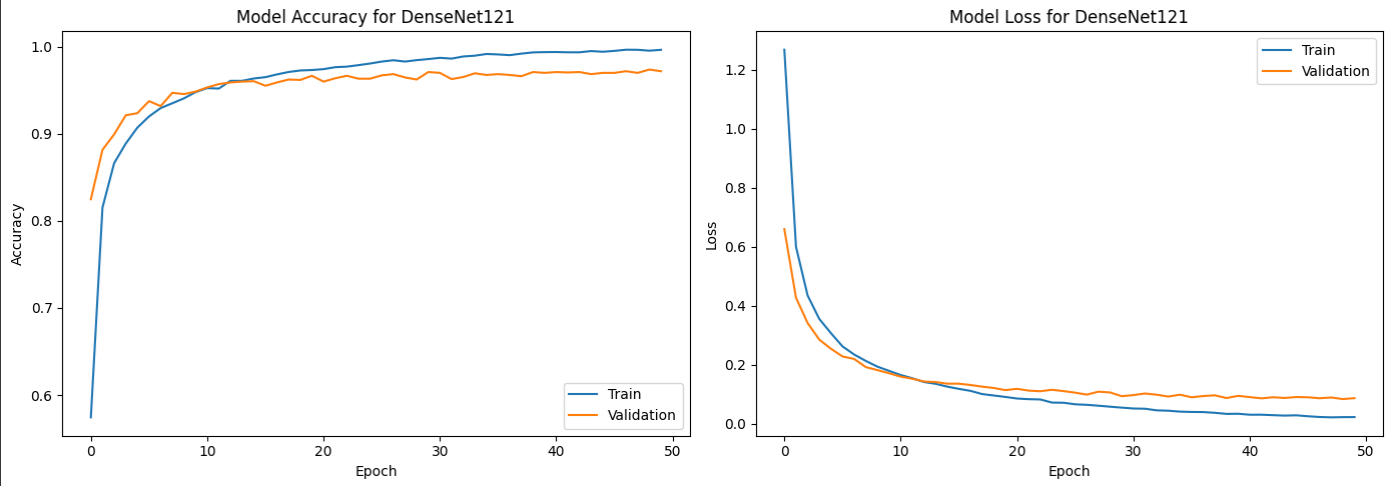
<ul>
    <li><b>Training Accuracy:</b>
    <p>The "Train" curve starts around 0.58-0.60 and rises sharply, achieving nearly perfect accuracy (approaching 0.995) by the end of training (Epoch 50)</p>
    </li> &nbsp
    <li><b>Validation Accuracy:</b>
    <p>Rises quickly from about 0.83 and plateaus around 0.95–0.98, showing good generalization with stable performance.
    </p> &nbsp
    </li>
    <li><b>Training Loss: </b>
    <p> The "Train" curve begins high, around 1.25, and consistently decreases throughout training, approaching 0 (around 0.2) by Epoch 50.
    </p> &nbsp
    </li>
    <li><b>Validation Loss:</b>
    <p>The "Validation" curve starts around 0.65, decreases significantly in the initial epochs (down to ~0.2 by Epoch 10), but then flattens out and fluctuates around 0.10 from approximately Epoch 20 onwards.
    </p> </li> &nbsp
</ul>


*  <b>**Interpretation:** </b>
    <p>DenseNet121 performs excellently, achieving high accuracy and low loss on both training and validation sets. The plateau in validation accuracy and slight gap from training metrics suggest minor overfitting, but the model still generalizes very well.</p> &nbsp


**B. Confusion Matrix Analysis**


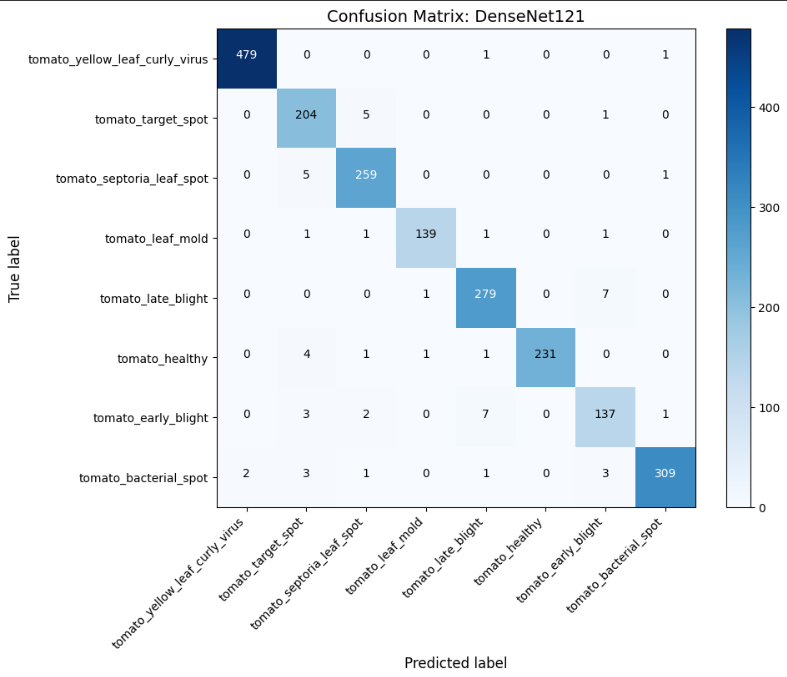











<b>Insights:</b>
<ul>
<li><b>Correct Classifications:</b>&nbsp The model correctly classified a total of 2037 instances across all eight classes. The highest number of correct classifications was for 'tomato_yellow_leaf_curly_virus' (479), followed by 'tomato_bacterial_spot' (309), and 'tomato_late_blight' (279).</li> &nbsp

<li> <b>Misclassifications:</b>&nbsp A total of 56 instances were misclassified. The highest single misclassification count is 'tomato_early_blight' being predicted as 'tomato_late_blight' (7 instances), and 'tomato_late_blight' being predicted as 'tomato_early_blight' (7 instances).</li>
</ul> &nbsp

<b>Analysis </b>
<ul>
<li><b>High Errors:</b> &nbsp DenseNet121 mostly struggles to tell apart 'tomato_late_blight' and 'tomato_early_blight', mixing them up 7 times each way. It also gets 'tomato_target_spot' and 'tomato_septoria_leaf_spot' confused fairly often. 'Tomato_early_blight' seems especially tricky, with 12 cases from its true label misclassified into other diseases. The model sometimes mistakes ‘tomato_septoria_leaf_spot’ for 'tomato_target_spot', which happens 5 times.
</li> &nbsp
<li><b>Best Performance:</b> &nbsp The model did an excellent job recognizing 'tomato yellow leaf curly virus', correctly classifying 479 images with only 2 mistakes, showing very high accuracy. It also handled 'tomato bacterial spot' and 'tomato late blight' well, with high correct counts and only a few mix-ups, despite some mutual confusion with 'early blight'.</li>
</ul> &nbsp


**C. mAP  (Mean Average Precision) :**


*   **mAP Score:** 0.994
*   **Interpretation:**  A mAP score of 0.994 shows that DenseNet121 performs exceptionally well, with excellent precision and recall across all classes. This high score confirms the model’s strong reliability in classifying tomato plant diseases and aligns with its high validation accuracy.



<h2><b>3. MobileNetv3</b></h2>

**A. Loss and Accuracy Analysis:**
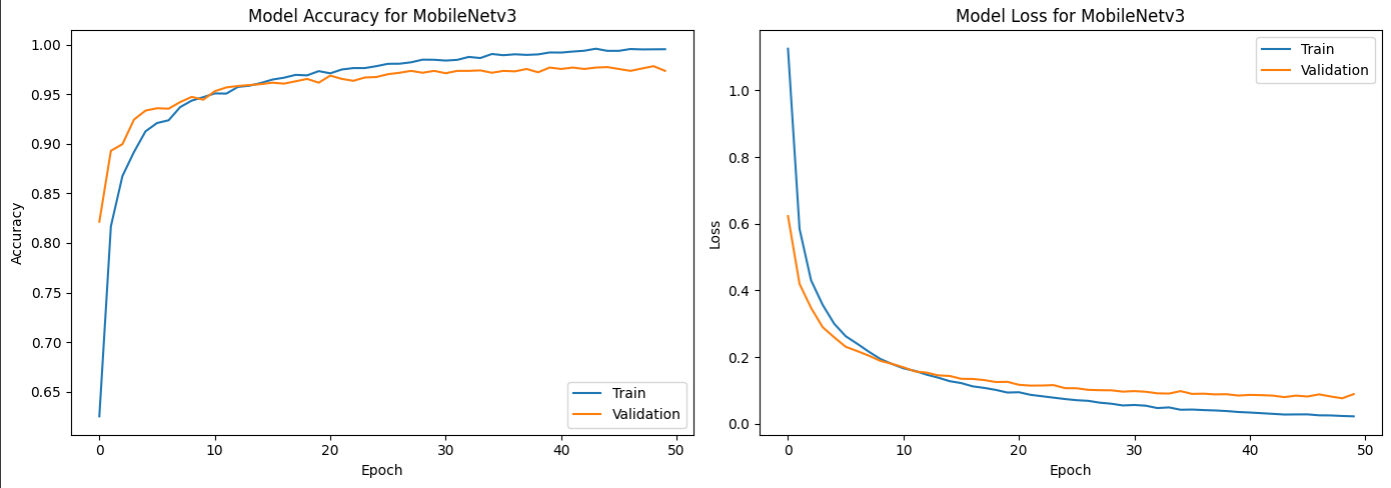


<ul>
    <li><b>Training Accuracy:</b>
    <p>The “Train” curve starts around 0.60 - 0.65 and rises sharply archiving nearly perfect accuracy (approaching 0.98) by the end of training (Epoch 50).
    </p> &nbsp
    </li>
    <li><b>Validation Accuracy:</b>
    <p>Starts around 0.82, quickly rises to approximately 0.95. This suggests a good generalization with stable validation performance. This graph has slightly plateaus.
    </p> &nbsp
    </li>
    <li><b>Training Loss: </b>
    <p>The “Train” curve begins high, at around 1.5 and consistently decreases throughout the training, approaching 0(around 0.2) by the end of training.  
    </p>
    </li> &nbsp
    <li><b>Validation Loss: </b>
    <p>The “Validation” curve starts around 0.61, decreasing initially during the first 10 epochs. The curve slightly decreases around 0.15-0.18  from approximately Epoch 10 onwards. This suggests minor overfitting but with strong performance.
    </p> &nbsp
    </li>
</ul>


*  <b>Interpretation:</b>
   <p>On both training and validation sets, MobileNetv3 shows outstanding results, with low loss and high accuracy. Although there may be some overfitting shown by a slight difference between training and validation, the overall trend remains stable, and the validation accuracy plateaus at a high level. </p> &nbsp



**B. Confusion Matrix Analysis:**

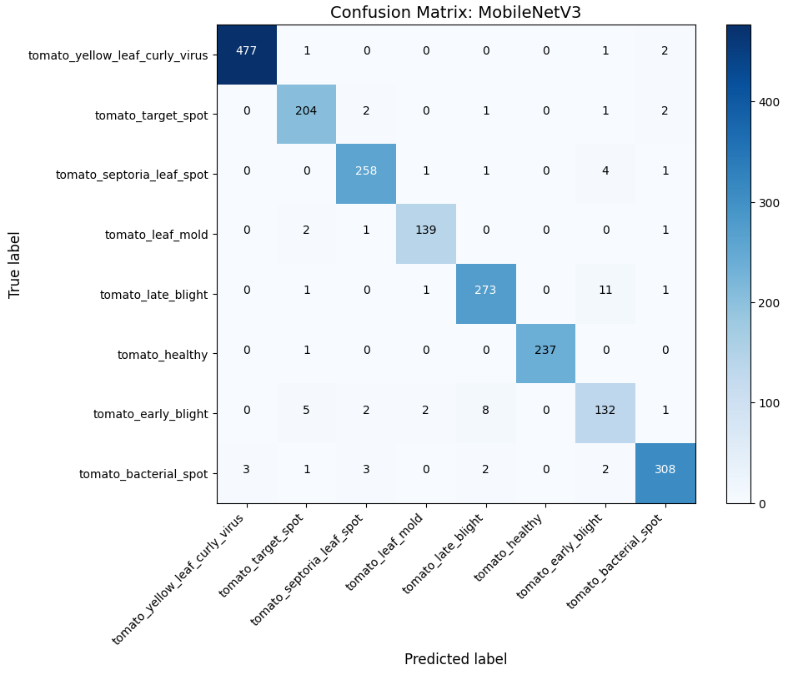





<b>Insights</b>
<ul>
 <li><b>Correct Classifications:</b> &nbsp A total of 2028 cases in all eight classes were correctly categorised by the model. The most accurate classifications were made for tomato_yellow_leaf_curly_virus(477), followed by tomato_bacterial_spot(308), and tomato_late_blight(273).
</li> &nbsp
 <li><b> Misclassifications:</b>&nbsp A total of 65 instances were misclassified. The most notable misclassification occurs when the model predicts 'tomato_early_blight' (11 instances) when the true label was 'tomato_late_blight' and 'tomato_late_blight' being predicted as 'tomato_early_blight' (8 instances). </li>
</ul>

<b>Analysis: </b>
<ul>
 <li><b>High Errors:</b> &nbsp  11 cases of real "late blight" were mistakenly classified as "early blight," indicating that the model's main area of confusion is between "tomato_early_blight" and "tomato_late_blight." It also means that the model may be challenged by the visually comparable aspects of these two diseases. With 18 cases from its true label being misclassified as other diseases, "tomato early blight" seems to be particularly problematic. Four times, the model mistakes "tomato_early blight" as "tomato_septoria_leaf_spot."</li> &nbsp

 <li><b>Best Performance:</b> &nbsp The model performed exceptionally well in classifying 'tomato_yellow_leaf_curl_virus' (477 correct, only 2 misclassified) and 'tomato_bacterial_spot' (308 correct, with 11 classifications). ‘tomato_late_blight ’ also performs well (273 correct, with 14 misclassified) even though it has some confusion with ‘tomato_early_blight’. This indicates that the model is highly accurate in identifying these specific disease types, especially those with more distinct visual patterns. </li>
</ul> &nbsp


**C. mAP  (Mean Average Precision) :**
*   **mAP Score:**  0.9911
*   **Interpretation:**  A mAP score of 0.9911 (99.11%) indicates that the model has achieved high levels of both precision and recall across all classes. Therefore, it makes MobileNetV3 highly accurate at identifying and correctly predicting each type of tomato disease.



<h2><b>Overall Conclusion and Comparison of CNN Models (ResNet50, DenseNet121, MobileNetV3)</b></h2>

<b>Model Evaluation Comparison</b>
<ul>
  <li><b> ResNet50 Test Loss:</b> 0.0539 because it makes fewer significant mistakes on the test data and remains highly confident in its predictions. </li> <p></p>
  <b>ResNet50 Test Accuracy:</b> 0.9833. This highly precise indicates that the model classified the majority of test photos correctly. It was quite good at learning features.
  
  <p><p>&nbsp

  <li><b>DenseNet121 Test Loss:</b> 0.0809 which means that there is a little more prediction error, but it is still modest.
 </li> <p></p>
  <b>DenseNet121 Test Accuracy:</b> 0.9732. It works efficiently but is less accurate than ResNet50, however still having great accuracy.

  <p></p>&nbsp

   <li><b>MobileNetv3 Test Loss:</b> 0.0906 because highest among the three it exhibits greater inaccuracy, perhaps as a result of the model's lesser weight and smaller size.
</li> <p></p>
   <b>MobileNetv3 Test Accuracy:</b> 0.9689 cause lower than ResNet50 and DenseNet121, but still strong. Good for lightweight applications with slight accuracy trade-off.
  <p></p>&nbsp

  <b>Interpretation</b>
  <p>ResNet50 performs the best in minimizing prediction errors, closely followed by DenseNet121 and then MobileNetV3, indicating that ResNet50’s architecture is more effective at capturing complex patterns in the data for this specific task. While all three models achieve very high classification accuracy and are highly capable, ResNet50 slightly outperforms the others, making it the most precise. The few variations, however, demonstrate that all three types are reliable and capable for their tasks.</p>

</ul> &nbsp

<b>Conclusion analysis between loss, accuracy and mAP</b>
<p>ResNet50 is the most accurate model, achieving the highest test accuracy (0.9833) and lowest test loss (0.0539), demonstrating strong generalization with minimal overfitting. DenseNet121 follows closely, balancing accuracy (0.9732) and efficiency, while MobileNetV3, though slightly less precise (0.9689 accuracy, 0.0906 loss), is the fastest to train, making it ideal for lightweight applications. Overall, ResNet50 excels in accuracy, while MobileNetV3 is preferable for speed-focused deployments.</p> &nbsp

<b>Overall Conclusion of CNN Models </b>
<p>ResNet50 is the most robust and accurate model among the three CNN models evaluated. It achieves the best test accuracy (0.9833) with lowest test loss (0.0539). Despite having the slowest training time (4507.30 seconds), this longer duration shows that the model learns more complex features thoroughly which results in highest accuracy compared to the other models. In comparison, DenseNet121 achieves slightly lower accuracy (0.9732) and a higher test loss (0.0809) with a faster training time (2001.54 seconds). It makes DenseNet121 a practical choice when efficiency is prioritized. Lastly, for MobileNetV3, it is the fastest to train (1698.36 seconds) and most lightweight while achieving the lowest test accuracy (0.9689) and highest test loss (0.0906). Its efficiency makes it well-suited for real-time or mobile deployment where speed and lightweight models are prioritized. Therefore, ResNet50 shows the best generalization with minimal overfitting and high precision, making it the preferred choice for accuracy-focused applications. </p>



**Save Data**

In [ ]:
model_resnet50.save('trained_model.h5')
model_denseNet121.save('trained_model.h5')
model_mobilenetV3.save('trained_model.h5')